# Método de Diferencias Finitas

La idea fundamental detras de el método de diferencias finitas es _remplazar las derivadas en la ecuación diferencial por aproximaciones discretas_, y evaluando en un marco para desarrollar un **sistema de ecuaciones**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problemas lineales de valores en la frontera

**Ejemplo 7.8** Resuelve el PVF,
$$ y'' = 4y \\ y(0)=1 \\ y(1) = 3 $$

Para este problema se va a considerar la formula de la diferencia centrada de la segunda derivada. La cual es

$$f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}  - \frac{h^2}{12}f^{(4)}(c), \quad c\in [x-h,x+h] $$

De forma numérica se tiene, con un error del orden $h^2$
$$ \frac{w_{i+1} - 2w_i + w_{i-1}}{h^2} - 4w_i = 0 $$
Equivalentemente,
$$ w_{i+1} - (4h^2+2)w_i + w_{i-1} = 0 $$

Utilizando las condiciones de frontera se tiene
$$ i = 1, \quad w_2 - (4h^2+2)w_1 +1 = 0 $$

$$ i = n-1, \quad 3 - (4h^2+2)w_{n-1} + w_{n-2} = 0 $$

En general, para estos problemas siempre se tiene esta característica con las condiciones de frontera. Además, por la estructura de las ecuaciones, en representación matricial, se tiene una matriz _diagonal dominante_. Por lo tanto, métodos iterativos para resolver sistemas de ecuaciones convergen. Se implementara el método de Jacobi para este problema.  

#### Solución exacta de la ecuación

Se puede encontrar la solución exacta de la cual es

$$ y =c_1e^{2x} + c2e^{-2x} $$

donde,

$$ c_1 = \frac{3e^2 - 1}{e^4 -1}, \quad c_2 = \frac{e^4 - 3e^2}{e^4 -1} $$



In [2]:
def y(t):
  c1 = (3*np.exp(2) - 1)/(np.exp(4) - 1)
  c2 = (np.exp(4) - 3*np.exp(2))/(np.exp(4)-1)
  return c1*np.exp(2*t) + c2*np.exp(-2*t)

### Solución numérica de la ecuación

In [3]:
def Jacobi(A, b, x = None, max_iter = 5000):

  # Se genera una condición inicial
  if x == None:
    x = np.zeros(A.shape[0])

  # Factorizando
  D = np.diag(A)
  R = A - np.diagflat(D)

  # Iteraciones de Jacobi
  for _ in range(max_iter):
    x = (b - np.dot(R, x))/D
  return x

In [4]:
n = 99 # Número de intervalos
a, b = 0, 1   # Intervalo
ya, yb = 1, 3 # Condiciones

# Step size
h = (b-a)/(n+1)
print(f'El tamaño de paso es {h:.6f}')

El tamaño de paso es 0.010000


In [5]:
# Sistema de ecuaciones
vec = np.zeros(n)
vec[0], vec[-1] = -ya, -yb

# Ecuaciones
D = -(4*h**2 + 2)*np.ones(n)
D1 = np.ones(n-1)

# Matriz de la forma
A = np.diag(D) + np.diag(D1, -1) + np.diag(D1, 1)

A

array([[-2.0004,  1.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    , -2.0004,  1.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    , -2.0004, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., -2.0004,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  1.    , -2.0004,  1.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  1.    , -2.0004]])

In [6]:
# Solución numérica
sol = Jacobi(A, vec)

# Agregar la frontera
sol = np.concatenate(([ya], sol, [yb]))

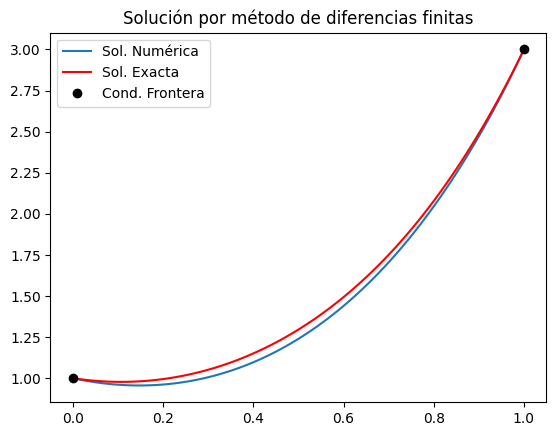

In [7]:
# Gráfica
t = np.linspace(a, b, n+2)

plt.plot(t, sol, label = 'Sol. Numérica')
plt.plot(t, y(t), 'r', label = 'Sol. Exacta')
plt.plot([a,b], [ya,yb], 'ok', label = 'Cond. Frontera')

plt.title('Solución por método de diferencias finitas')
plt.legend()
plt.show()

## Problemas no lineales con valores en la frontera

$$ y'' = e^y \\ y(0) = 1 \\ y(1) = 3 $$


In [8]:
n = 99 # Número de intervalos
a, b = 0, 1   # Intervalo
ya, yb = 1, 3 # Condiciones

# Step size
h = (b-a)/(n+1)
print(f'El tamaño de paso es {h:.6f}')

El tamaño de paso es 0.010000


In [9]:
# Ecuación discretizada
def F(w):
  f = [ya - (2*w[0]+h**2*np.exp(w[0])) + w[1]]
  for i in range(1, len(w)-1):
    f.append(w[i-1] - (2*w[i] + h**2*np.exp(w[i])) + w[i+1])

  f.append(w[-2] - (2*w[-1] + h**2*np.exp(w[-1])) + yb)
  return np.array(f)

# Matriz Jacobiana
def Df(w):
  # Ecuaciones
  D = -(2 + h**2*np.exp(w)) #Esta matriz es diagonal dominante
  D1 = np.ones(len(w)-1)

  # Matriz de la forma
  J = np.diag(D) + np.diag(D1, -1) + np.diag(D1, 1)
  return J

In [10]:
# Sistema lineal iterado
w = np.zeros(n)
# Iteraciones del método de Newton
N = 6
for _ in range(N):
  delta_w = Jacobi(Df(w), -F(w)) #Incrementos
  w += delta_w # Agregar un incremento

w = np.concatenate(([ya], w, [yb]))

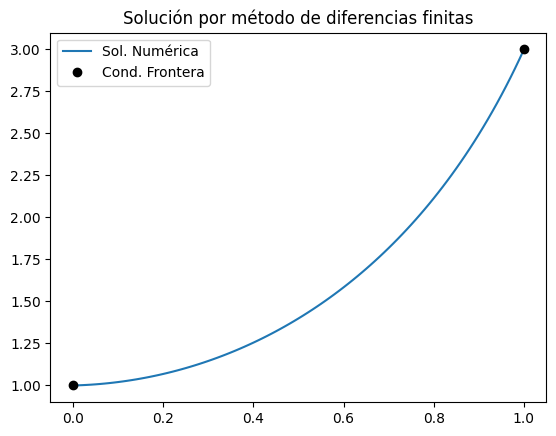

In [11]:
# Gráfica
t = np.linspace(a, b, n+2)

plt.plot(t, w, label = 'Sol. Numérica')
plt.plot([a,b], [ya,yb], 'ok', label = 'Cond. Frontera')

plt.title('Solución por método de diferencias finitas')
plt.legend()
plt.show()

#### Problema 11, capítulo 7.

Resuleva $$ y'' = cy(1-y) \atop y(0) = 0, \quad y(1/2) = 1/4, \quad y(1) = 1 $$

para $c>0$, con tres decimales correctos.

In [12]:
p1, p2, p3 = 0, 1/2, 1
y1, y2, y3 = 0, 1/4, 1

In [13]:
def biseccion(a, b ,f, tol = 10**-3):
  if f(a)*f(b) < 0:
    c = 0
    while (b-a)/2 > tol:
      c = (a+b)/2
      if f(c) == 0:
        return c
      elif f(a)*f(c) < 0:
        b = c
      else:
        a = c
    return c
  else:
    return 'Error de condiciones'

In [14]:
# Ecuación discretizada
def F(w, c, h):
  f = [y1 - (2 + c*h**2)*w[0] + c*h**2*w[0]**2 + w[1]]
  for i in range(1, len(w)-1):
    f.append(w[i-1] - (2 + c*h**2)*w[i] + c*h**2*w[i]**2 + w[i+1])

  f.append(w[-2] - (2 + c*h**2)*w[-1] + c*h**2*w[-1]**2 + y3)
  return np.array(f)

# Matriz Jacobiana
def Df(w, c, h):
  # Ecuaciones
  D = -(2 + c*h**2) + 2*c*h**2*w #Esta matriz es diagonal dominante
  D1 = np.ones(len(w)-1)

  # Matriz de la forma
  J = np.diag(D) + np.diag(D1, -1) + np.diag(D1, 1)
  return J

In [15]:
# Sistema lineal iterado
# Iteraciones del método de Newton
def Newton(n, c, y2, h):
  if n%2:
    n += 1

  pm = n//2

  w = np.zeros(n)
  N = 6
  for _ in range(N):
    delta_w = Jacobi(Df(w, c, h), -F(w, c, h)) #Incrementos
    w += delta_w
  return y2 - w[pm]

In [16]:
n = 99
h = (y3-y1)/(n+1)

phi = lambda c : Newton(n, c, y2, h)

In [17]:
c_bis = biseccion(0, 15, phi)

In [18]:
# Sistema lineal iterado
w = np.zeros(n)
# Iteraciones del método de Newton
N = 6
for _ in range(N):
  delta_w = Jacobi(Df(w, c_bis, h), -F(w, c_bis, h)) #Incrementos
  w += delta_w # Agregar un incremento

w = np.concatenate(([y1], w, [y3]))

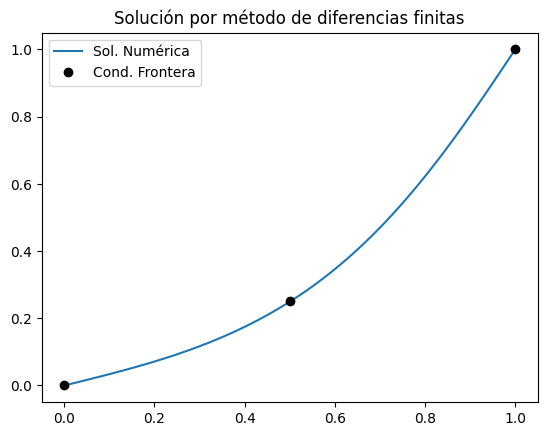

In [19]:
# Gráfica
t = np.linspace(p1, p3, n+2)

plt.plot(t, w, label = 'Sol. Numérica')
plt.plot([p1, p2, p3], [y1,y2,y3], 'ok', label = 'Cond. Frontera')

plt.title('Solución por método de diferencias finitas')
plt.legend()
plt.show()